### Intalling libs

In [1]:
# pip install pydotplus
# pip install threadpoolctl==3.1.0

!pip install numpy==1.23

### Column description

| Variável 	| Descrição 	|
|:-:	|:-	|
| PassangerID 	| ID de identificação do passageiro(a) 	|
| Survived 	| se o passageiro(a) sobreviveu (0 = não, 1 = sim) 	|
| Pclass 	| classe do passageiro:<br>     * **1 = primeira**,<br>     * **2 = segunda**,<br>     * **3 = terceira** 	|
| name 	| nome do passageiro(a) 	|
| sex 	| sexo do passageiro(a) 	|
| age 	| idade do passageiro(a) 	|
| Sibsp 	| número de irmão(ãs)/esposo(a) à bordo 	|
| Parch 	| número de pais/filhos(as) à bordo 	|
| Ticket 	| número da passagem 	|
| Fare 	| preço da passagem 	|
| Cabin 	| cabine 	|
| Embarked 	| local que o passageiro(a) embarcou:<br>     * **C = Cherboug**,<br>     * **Q = Queenstown**,<br>     * **S = Southamption** 	|
| WikiId 	| ID de identificação do passageiro(a) segundo Wikipedia 	|
| Name_wiki 	| nome do passageiro(a) 	|
| Age_wiki 	| idade do passageiro(a) 	|
| Hometown 	| cidade de nascimento do passageiro(a) 	|
| Boarded 	| cidade de embarque 	|
| Destination 	| destino da viagem 	|
| Lifeboat 	| identificação do bote salva-vidas 	|
| Body 	| número de identificação do corpo 	|


<font color='red'>**IMPORTANT**</font>

The new features (the ones after 'Embarked') are very similar to the original ones but they are more up-to-date and have much fewer missing values. Therefore, users can decide on the preferred features themselves.

### Importing Libs

In [16]:
# dataset import
from sklearn.datasets import (
    load_boston
)

# data visualization
%matplotlib inline
import seaborn as sns

import matplotlib.pyplot as plt

from seaborn import (
    jointplot,
    pairplot,
    boxplot,
    heatmap
)

from yellowbrick.features import (
    Rank2D, 
    RadViz,
    FeatureImportances,
    ParallelCoordinates,
    JointPlotVisualizer,
)

import dtreeviz

import pydotplus

from io import(
    StringIO
)

from IPython.display import (
    Image
)

# data manipulation
import numpy as np
import pandas as pd
from pandas.plotting import(
    radviz
)

import janitor as jn

from ydata_profiling import ProfileReport

from sklearn.decomposition import PCA

from sklearn.preprocessing import (
    StandardScaler
)

from yellowbrick.features.pca import (
    PCADecomposition
)

import umap.umap_ as umap

from sklearn.manifold import TSNE

import phate

# missing values
import missingno as msno

from sklearn.impute import (
    SimpleImputer
)

# machine learning models
from sklearn import (
    svm,
    tree,
    impute,
    ensemble,
    preprocessing,
    model_selection
)

from sklearn.utils import (
    resample
)

from sklearn.dummy import (
    DummyClassifier
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.experimental import (
    enable_iterative_imputer
)

from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.tree import (
    plot_tree,
    export_graphviz,
    DecisionTreeRegressor,
    DecisionTreeClassifier,
)

from sklearn.neighbors import (
    KNeighborsClassifier,
    KNeighborsRegressor
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.svm import (
    SVC,
    SVR
)

from sklearn.ensemble import (
    RandomForestRegressor,
    RandomForestClassifier
)

from imblearn.over_sampling import (
    RandomOverSampler,
)

from sklearn.dummy import (
    DummyRegressor
)

from sklearn.cluster import (
    KMeans
)

import shap

import rfpimp

import lightgbm as lgb

import xgboost as xgb

from xgboost import (
    XGBRegressor
)

import xgbfir

# data model metrics
from lime import (
    lime_tabular
)

from treeinterpreter import (
    treeinterpreter as ti
)

from sklearn import (
    metrics
)

from sklearn.metrics import (
    auc,
    f1_score,
    roc_curve,
    recall_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    average_precision_score
)

import scikitplot as skplt

from yellowbrick.classifier import (
    ROCAUC,
    ClassBalance,
    ConfusionMatrix,
    ClassPredictionError,
    ClassificationReport,
    PrecisionRecallCurve,
    DiscriminationThreshold,
)

from yellowbrick.regressor import (
    PredictionError
)

from yellowbrick.model_selection import (
    LearningCurve,
    ValidationCurve,
)

from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer
)

from scipy import (
    stats
)

from scipy.cluster import (
    hierarchy
)

# data prep-model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    learning_curve
)

# model deploy
import pickle

### Reading the Titanic Dataset

In [3]:
df = pd.read_csv("titanic_dataset.csv", index_col=0)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


### Deleting _Class_ feature at the end
We are deleting because is the same as _pclass_ (same result, same data)

In [4]:
df = df.drop('Class', axis = 'columns')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Converting DataFrame Column Names to Lowercase snakecase

In [5]:
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

df

,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Preparing the dataset

In [6]:
# dropping columns taht do not add value
df = df.drop(columns = ['name',
                        'name_wiki',
                        'wiki_id',
                        'hometown',
                        'destination',
                        'ticket',
                        'lifeboat',
                        'body',
                        'cabin',
                        'age'])

# using get_dummies function to convert object to int
df = pd.get_dummies(df)

# dropping redundant features
df = df.drop(columns = ['sex_male'])

#remove rows with any values that are not finite (NaN or infite)
df = df[np.isfinite(df).all(1)]

# first, we need to create a series of the target feature
y = df.survived

# then, we create a DataFrame with the attributes
X = df.drop(columns = ['survived'])

# using the scikit-learn to split 30% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
X.isnull().sum()

pclass                 0
sib_sp                 0
parch                  0
fare                   0
age_wiki               0
sex_female             0
embarked_C             0
embarked_Q             0
embarked_S             0
boarded_Belfast        0
boarded_Cherbourg      0
boarded_Queenstown     0
boarded_Southampton    0
dtype: int64

In [8]:
y.isnull().sum()

0

In [9]:
X.shape, y.shape

((887, 13), (887,))

### Clustering
Clustering is an unsupervised machine learning technique used to divide a group into sets. It is unsupervised because we do not provide any labels to the model; it simply inspects the attributes and determines which samples are similar and belong to a cluster.

### K-Means
The k-means algorithm requires the user to select the number of clusters, that is, *k*. Then, it randomly chooses *k* centroids and assigns each sample to a cluster based on the distance-from-centroid metric. After assignment, centroids are recalculated based on the center of all samples assigned to a label. Then, the assignment of samples to clusters is repeated based on the new centroids. After a few iterations, there should be a convergence.<br>

Because clustering uses distance metrics to determine which samples are similar, behavior may change depending on the scale of the data. We can standardize the data and put all attributes on the same scale. Some people have suggested that a subject matter expert might advise against standardization if the scale indicates that some attributes are more important.

In [10]:
X_std = preprocessing.StandardScaler().fit_transform(
    X
)

km = KMeans(2, random_state=42)
km.fit(X_std)

KMeans(n_clusters=2, random_state=42)

Once the model is trained, we can call the *.predict()* method to assign new samples to a cluster

In [11]:
X_km = km.predict(X)
X_km

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names


array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,

**Instance parameters**<br>

*n_clusters=8*
- number of clusters to be created

*init='kmeans++'*
- startup method

*n_init=10*
- number of times the algorithm must execute with different centroids. The best score will win

*max_iter=300*
- number of iterations for an execution

*tol=0.0001*
- tolerance until convergence

*precompute_distances='auto'*
- pre-calculate distances (requires more memory, but is faster). 'auto' will precalculate if *n_samples* * *n_clusters* is less than or equal to 12m

*copy_x=True*
- copies data before processing

*n_jobs=1*
- number of CPUs to be used

*algorithm='auto'*
- **K-means** algorithm. 'full' works with sparse data, but 'elkan' is more effective. 'auto' uses 'elkan' with dense data
<br><br>

**Attributes**<br>

*cluster_centers_*
- coordinates of the centers

*labels_*
- labels for samples

*inertial_*
- sum of the squares of the distances to the cluster centroid

*n_iter_*
- number of iterations

If we don't know the best number of clusters, we can run the algorithm with different sizes and evaluate various metrics.

We can also implement the elbow graph using *.inertia_*. Look for the point where the curve bends, as this will possibly be a good option for the number of clusters. In our case, the curve is smooth, but after 8, there doesn't seem to be much improvement.

For graphics without an elbow, we have a few options. We can use other metrics. We can also visually inspect the clustering and see if clusters are visible. We can add attributes to the data and see if that helps with clustering.

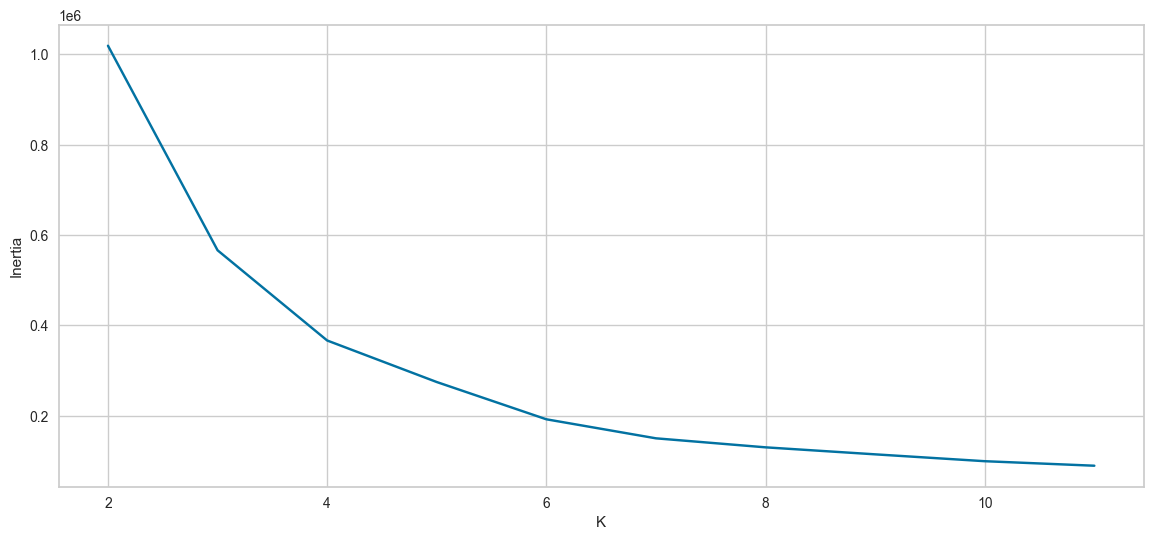

In [12]:
# elbow graph
inertias = []
sizes = range(2, 12)

for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X)
    inertias.append(k2.inertia_)

fig, ax = plt.subplots(figsize=(14, 6))

pd.Series(inertias, index=sizes).plot(ax=ax)

ax.set_xlabel("K")
ax.set_ylabel("Inertia")

fig.savefig("images/clustering_kmeans_elbow_graph_matplotlib")

**scikit-learn** has other clustering metrics when the true labels are not known. We can calculate these values and graph them as well. The *silhouette coefficient* is a value between -1 and 1. The higher the value, the better it will be. The value 1 indicates brighter clusters, while 0 implies clusters that overlap. From this measure, two clusters give us the best score.

The *Calinski-Harabasz Index* is the ratio between intercluster dispersion and intracluster dispersion. A higher score will be better. Two clusters give the best score for this metric.

The *Favis-Bouldin Index* is the average similarity between each cluster and the closest cluster. Scores range from 0 or more. A value of 0 indicates better clustering.

Next, we will graph the information on *Inertia*, *Silhouette Coefficient*, *Calinski-Harabasz Index*, and *Favis-Bouldin Index* for different cluster sizes, in order to compare and analyze whether there is a evident size of clusters for the data.

/var/folders/vb/yxjjx1m94n93ty4t50m8f2b40000gn/T/ipykernel_19878/1105144189.py:32: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.


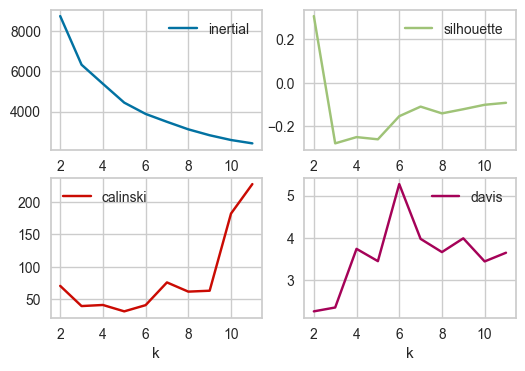

In [13]:
# parameters
inertias = []
sils     = []
chs      = []
dbs      = []
sizes    = range(2, 12)

for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(X_std)
    
    inertias.append(k2.inertia_)
    sils.append(
        metrics.silhouette_score(
            X, k2.labels_
        )
    )
    chs.append(
        metrics.calinski_harabasz_score(
            X, k2.labels_
        )
    )
    dbs.append(
        metrics.davies_bouldin_score(
            X, k2.labels_
        )
    )
    
fig, ax = plt.subplots(figsize=(6, 4))

(
    pd.DataFrame(
        {
            "inertial"  : inertias,
            "silhouette": sils,
            "calinski"  : chs,
            "davis"     : dbs,
            "k"         : sizes
        }
    )
    .set_index("k")
    .plot(ax=ax, subplots=True, layout=(2, 2))
)

fig.savefig("images/clustering_kmeans_other_metrics_matplotlib")

Another technique for determining clusters is to view the silhouette scores for each cluster. **Yellowbrick** has a viewer for this.

In this graph, the vertically dotted red line is the average score. One way to interpret this is to ensure that each cluster stands out above average, and the cluster scores appear reasonable.

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/style/colors.py:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/style/colors.py:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/style/colors.py:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-pack

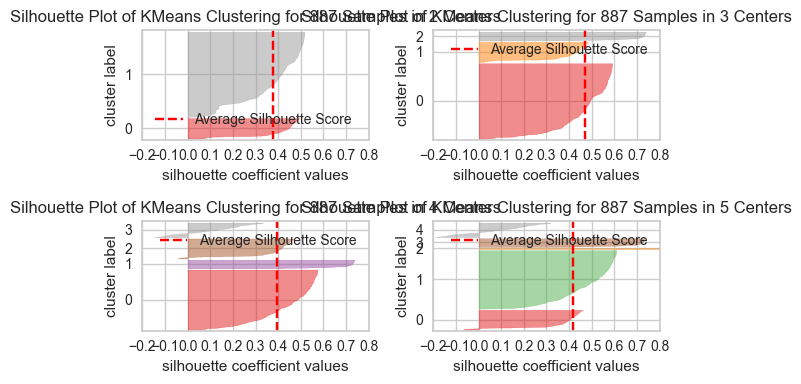

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
axes = axes.reshape(4)

for i, k in enumerate(range(2, 6)):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax
    )
    sil.fit(X_std)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)

plt.tight_layout()

fig.savefig("images/clustering_kmeans_silhouette_graph_yellowbrick")

### Hierarchical Clustering
Another methodology is agglomerative clustering. Start with each sample in its own cluster. Then combine the "closest" clusters. Repeat until finished, while keeping track of the closest sizes. When finished, you will have a *dendrogram*, that is, a tree that controls when the clusters were created and what the distance metric is. We can use the **scipy** lib to create a *dendrogram*. If the dataset has many samples, it will be difficult to read leaf nodes.

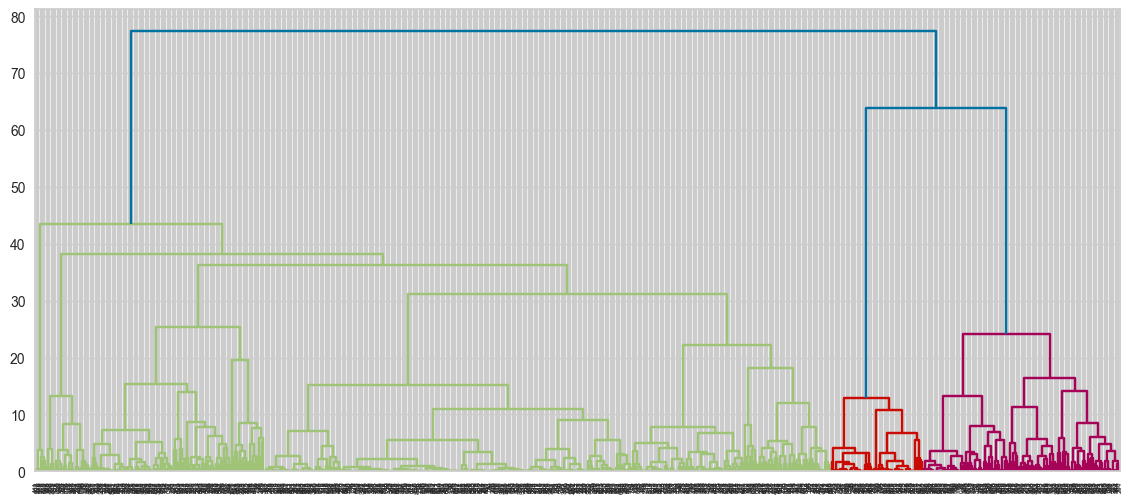

In [19]:
fig, ax = plt.subplots(figsize=(14, 6))

dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method='ward')
)

fig.savefig("images/clustering_hierarchical_clustering_dendrogram_matplotlib")

After obtaining the dendrogram, we will have all the clusters. The heights represent the level of similarity of the clusters when they are joined. To find out how many clusters there are in the data, we can draw a horizontal line at the point where it crosses the highest lines.

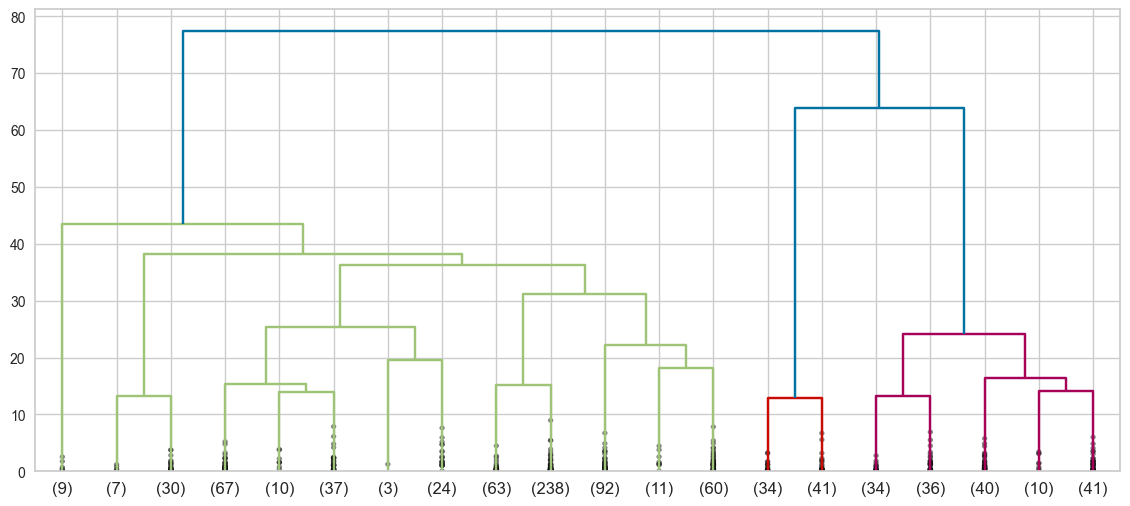

In [21]:
fig, ax = plt.subplots(figsize=(14, 6))

dend = hierarchy.dendrogram(
    hierarchy.linkage(X_std, method='ward'),
    truncate_mode="lastp",
    p=20,
    show_contracted=True
)

fig.savefig("images/clustering_hierarchical_clustering_with_limits_dendrogram_matplotlib")